In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

In [221]:
data = pd.read_csv('https://bit.ly/3C8JzrM', header=0)

In [222]:
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values
n = len(y)

In [223]:
def regression_fcn(x_values, m: float = 0, b: float = 0):
    return m * x_values + b

In [224]:
def loss_function(y_true, y_predict):
    loss = 0
    n = len(y_true)
    for idx, y in enumerate(y_true):
        loss += (y_predict[idx] - y)**2
    loss = loss / n

    return np.sqrt(loss)

In [225]:
def gradient_(m_current, b_current, y_true, x):
    n = len(y_true)
    for idx, y in enumerate(y_true):
        dm = 2/n * x[idx] * ((m_current * x[idx] + b_current) - y)
        db = 2/n * ((m_current * x[idx] + b_current) - y)

    return dm, db

In [226]:
# main
m = 0.0
b = 0.0
seperator = 3
learning_rate = 0.001
iterations = 100
m_history = np.zeros(iterations)
b_history = np.zeros(iterations)
loss_history = np.zeros(iterations)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/seperator)


for idx in range(iterations):
    fcn_predict = regression_fcn(x_values=x, m=m, b=b)
    loss = loss_function(y_true=y_train, y_predict=fcn_predict)
    dm, db = gradient_(m_current=m, b_current=b, y_true=y_train, x=x_train)
    m_history[idx] = dm
    b_history[idx] = db
    loss_history[idx] = loss
    m -= dm * learning_rate
    b -= db * learning_rate

print(f'Final loss value for training set: {loss}')
loss = loss_function(y_true=y_test, y_predict=fcn_predict)
print(f'Final loss value for training set: {loss}')



Final loss value for training set: 72.76360424427658
Final loss value for training set: 81.3108033825947


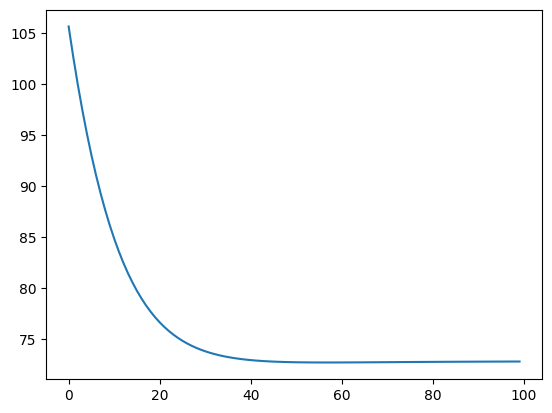

In [227]:
plt.plot(range(iterations), loss_history)

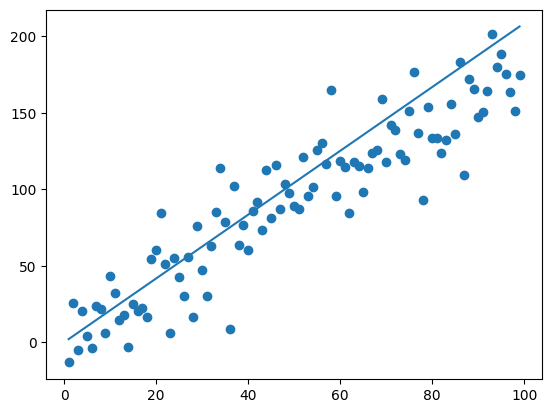

In [228]:
plt.scatter(x,y)
plt.plot(x,fcn_predict)

In [229]:
print('Version 1 mit scipy: Korrelationskoeffizient nach Pearson:')
print('{0}'.format(stats.pearsonr(x, y)))
r = stats.pearsonr(x, y)[0]

Version 1 mit scipy: Korrelationskoeffizient nach Pearson:
PearsonRResult(statistic=np.float64(0.9242100628677159), pvalue=np.float64(2.4452525699308e-42))


In [230]:
print('Version 2 mit pandas: Korrelationskoeffizient nach Pearson:')
print('{0}'.format(data.corr(method='pearson')))

Version 2 mit pandas: Korrelationskoeffizient nach Pearson:
         x        y
x  1.00000  0.92421
y  0.92421  1.00000


In [231]:
lower_cv = stats.t(n-1).ppf(0.025)
upper_cv = stats.t(n-1).ppf(0.975)

print('Lower and upper bounds of t-test: {0} / {1}'.format(lower_cv, upper_cv))

Lower and upper bounds of t-test: -1.9844674544266925 / 1.984467454426692


In [232]:
test_value = r / np.sqrt((1 - r ** 2) / (n - 2))

if test_value < lower_cv or test_value > upper_cv:
    print('Correlation is statiscally signifanct!')
else:
    print('Looser!')

Correlation is statiscally signifanct!
